Use the Decision Tree classification algorithm to construct a classifier on two 
datasets. Evaluate the classifier's performance by dividing the dataset into a training 
set (75%) and a test set (25%). Compare the performance with that of: 
a. Bagging ensemble consisting of 3,5,7,9 Decision tree classifiers 
b. Adaboost ensemble consisting of 3,5,7,9 Decision tree classifiers

In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier, AdaBoostClassifier
from sklearn.metrics import accuracy_score

In [16]:
# Load datasets
data1 = pd.read_csv('db/diabetes.csv')
data2 = pd.read_csv('db/Iris.csv')

# Assume the last column is the target variable
X1, y1 = data1.iloc[:, :-1], data1.iloc[:, -1]
X2, y2 = data2.iloc[:, :-1], data2.iloc[:, -1]

# Split the datasets into training and testing sets
X_train1, X_test1, y_train1, y_test1 = train_test_split(X1, y1, test_size=0.25, random_state=42)
X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, y2, test_size=0.25, random_state=42)

In [17]:
data1.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [18]:
data2.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [19]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [20]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


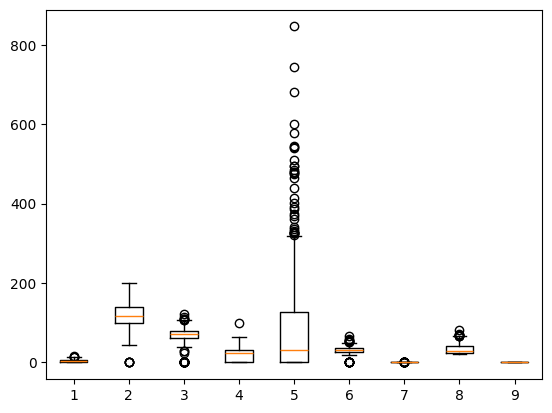

In [21]:
plt.boxplot(data1)
plt.show()

In [22]:
print("IBM has a lot of outliers so we will remove this column to reduce the misbehaiver of classifier")
data1=data1.drop("BMI",axis=1)
data2.info()

IBM has a lot of outliers so we will remove this column to reduce the misbehaiver of classifier
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


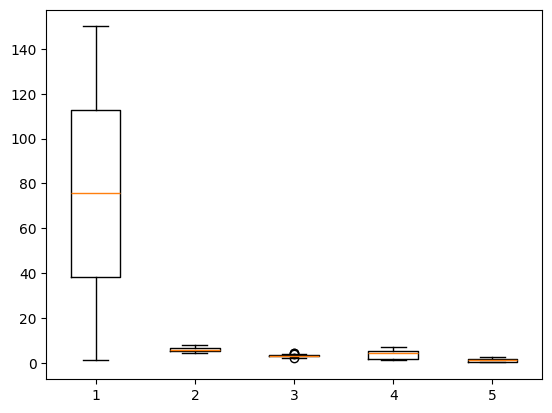

In [23]:
plt.boxplot(data2.drop("Species",axis=1))
plt.show()

In [24]:
def evaluate_decision_tree(X_train, X_test, y_train, y_test):
    dt = DecisionTreeClassifier(random_state=42)
    dt.fit(X_train, y_train)
    y_pred = dt.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    return accuracy

accuracy_dt1 = evaluate_decision_tree(X_train1, X_test1, y_train1, y_test1)
accuracy_dt2 = evaluate_decision_tree(X_train2, X_test2, y_train2, y_test2)

print(f"Decision Tree Accuracy on Dataset 1: {accuracy_dt1}")
print(f"Decision Tree Accuracy on Dataset 2: {accuracy_dt2}")


Decision Tree Accuracy on Dataset 1: 0.7083333333333334
Decision Tree Accuracy on Dataset 2: 1.0


In [25]:
def evaluate_bagging(X_train, X_test, y_train, y_test, n_estimators):
    bagging = BaggingClassifier(n_estimators=n_estimators, random_state=42)
    bagging.fit(X_train, y_train)
    y_pred = bagging.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    return accuracy

for n in [3, 5, 7, 9]:
    accuracy_bagging1 = evaluate_bagging(X_train1, X_test1, y_train1, y_test1, n)
    accuracy_bagging2 = evaluate_bagging(X_train2, X_test2, y_train2, y_test2, n)
    print(f"Bagging Accuracy on diabetes dataset with {n} trees: {accuracy_bagging1}")
    print(f"Bagging Accuracy on iris dataset with {n} trees: {accuracy_bagging2}")


Bagging Accuracy on diabetes dataset with 3 trees: 0.6614583333333334
Bagging Accuracy on iris dataset with 3 trees: 1.0
Bagging Accuracy on diabetes dataset with 5 trees: 0.7135416666666666
Bagging Accuracy on iris dataset with 5 trees: 1.0
Bagging Accuracy on diabetes dataset with 7 trees: 0.71875
Bagging Accuracy on iris dataset with 7 trees: 1.0
Bagging Accuracy on diabetes dataset with 9 trees: 0.703125
Bagging Accuracy on iris dataset with 9 trees: 1.0


In [26]:
def evaluate_adaboost(X_train, X_test, y_train, y_test, n_estimators):
    adaboost = AdaBoostClassifier(n_estimators=n_estimators, random_state=42)
    adaboost.fit(X_train, y_train)
    y_pred = adaboost.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    return accuracy

for n in [3, 5, 7, 9]:
    accuracy_adaboost1 = evaluate_adaboost(X_train1, X_test1, y_train1, y_test1, n)
    accuracy_adaboost2 = evaluate_adaboost(X_train2, X_test2, y_train2, y_test2, n)
    print(f"AdaBoost Accuracy on Dataset 1 with {n} trees: {accuracy_adaboost1}")
    print(f"AdaBoost Accuracy on Dataset 2 with {n} trees: {accuracy_adaboost2}")


/home/arya/Desktop/Data_Mining-II/.venv/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/home/arya/Desktop/Data_Mining-II/.venv/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/home/arya/Desktop/Data_Mining-II/.venv/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


AdaBoost Accuracy on Dataset 1 with 3 trees: 0.71875
AdaBoost Accuracy on Dataset 2 with 3 trees: 1.0
AdaBoost Accuracy on Dataset 1 with 5 trees: 0.75
AdaBoost Accuracy on Dataset 2 with 5 trees: 1.0


/home/arya/Desktop/Data_Mining-II/.venv/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/home/arya/Desktop/Data_Mining-II/.venv/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/home/arya/Desktop/Data_Mining-II/.venv/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/home/arya/Desktop/Data_Mining-II/.venv/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and w

AdaBoost Accuracy on Dataset 1 with 7 trees: 0.734375
AdaBoost Accuracy on Dataset 2 with 7 trees: 1.0
AdaBoost Accuracy on Dataset 1 with 9 trees: 0.734375
AdaBoost Accuracy on Dataset 2 with 9 trees: 1.0


/home/arya/Desktop/Data_Mining-II/.venv/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
